In [259]:
import numpy as np 
import pandas as pd

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
df = pd.read_csv('C://Users//Anubhav//Desktop//Data Science//EDA OF TITANIC DATASET//train.csv')

In [262]:
df.shape
# gives the number of rows and columns

(891, 12)

In [263]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [264]:
# listing the columns values
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### Categorical datas
**Suvived, Pclass, Sex, SibSp,Parch ,Embarked**
### Numerical
**Age, Fare, Passenger**
### Mixed Columns
**Name, Ticket, Cabin**

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [266]:
# MISSING VALUES IN EACH COLUMNS
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [267]:
# DROPPING Cabin COLUMN AS IT HAS 687 NULL VALUES OUT OF 891 VALUES
df.drop(columns=['Cabin'], inplace= True)

In [268]:
# IMPORTANT

# we replace blank with nan then remove it if any error is given
# df['Age'].replace(r'^\s*$', np.nan, regex=True, inplace=True)


# df[].fillna[value=df/series/most frequent number, method= bfill/ffill, axis=0/1,]
# method=backfill’/‘bfill’ fills holes with next valid observation. 
# ‘pad’/‘ffill’ fills holes with last valid observation
# Axis along which to fill missing values

# one more thing if you write df['Age'].fillna(df['Age'].mean()) it will not remove the blank value

In [269]:
# FILLING MISSING VALUES WITH MEAN OF THE Age COLUMN  

df['Age'].fillna(df['Age'].mean(), inplace=True)

#df['Age'].fillna( {'Age': df['Age'].mean()})



In [270]:
df['Age'].isna().sum()

0

In [271]:
# fibding most frequent value and filling the misiing value
df['Embarked'].value_counts()

df['Embarked'].fillna('S', inplace=True)
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [272]:

# Should I change the SibSp and Parch to categories

df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [273]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### Changing data type for the following cols
Survived(category)
PClass(category)
Sex(category)
Age(int)
Embarked(category)

In [274]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


Out of 891 62 people died in the accident


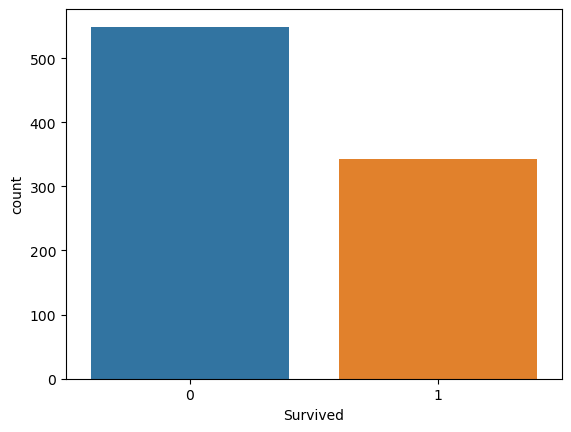

In [276]:
# univariate analysis
sns.countplot(x='Survived' , data = df)

death_percent=round((df['Survived'].value_counts().values[0]/891)*100)

print("Out of 891 {} people died in the accident".format(death_percent))

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


<Axes: xlabel='Pclass', ylabel='count'>

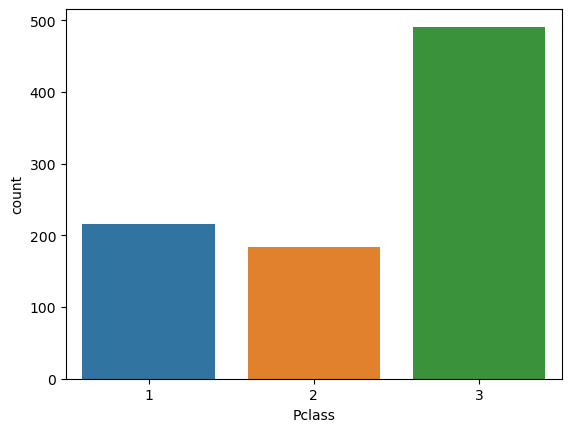

In [277]:
# univariate for Pclass

print((df['Pclass'].value_counts()/891)*100)
sns.countplot(x='Pclass', data = df)

# sns.countplot(df['Pclass']) gives different output

male      64.758698
female    35.241302
Name: Sex, dtype: float64


<Axes: xlabel='Sex', ylabel='count'>

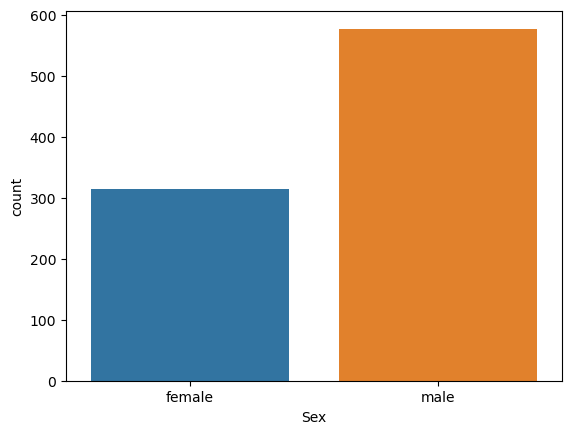

In [278]:
# NOW FOR SEX COLUMN
print((df['Sex'].value_counts()/891)*100)

sns.countplot(x='Sex', data= df)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


<Axes: xlabel='SibSp', ylabel='count'>

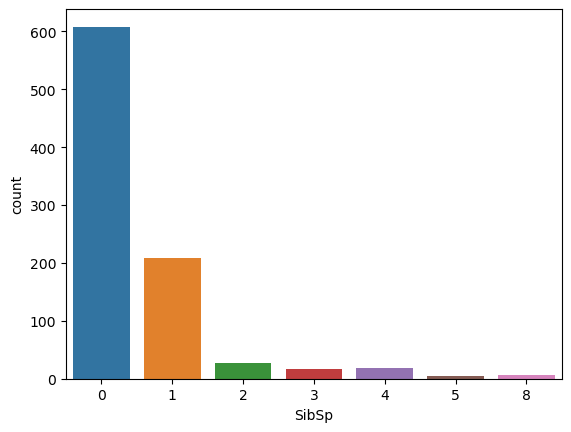

In [279]:
# for sibsp column
print(df['SibSp'].value_counts())

sns.countplot(x='SibSp', data = df)

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


<Axes: xlabel='Parch', ylabel='count'>

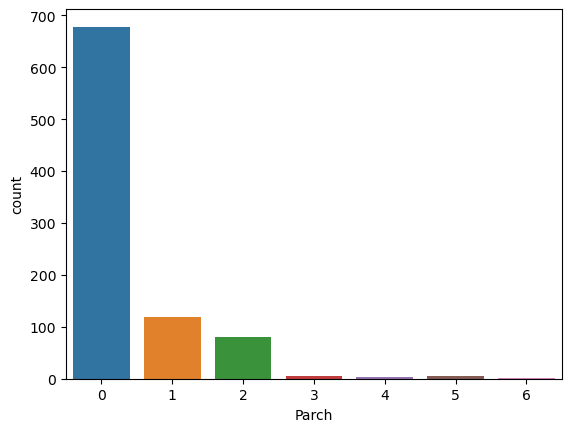

In [280]:
# for parch column
print((df['Parch'].value_counts()/891)*100)

sns.countplot(x='Parch', data=df)

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


<Axes: xlabel='Embarked', ylabel='count'>

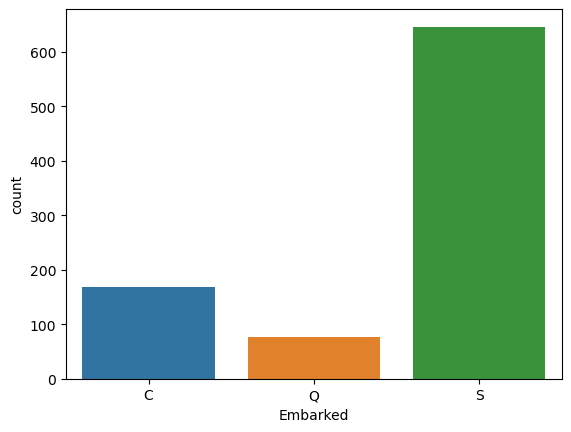

In [281]:
# for embarked column
print((df['Embarked'].value_counts()/891)*100)

sns.countplot(x='Embarked', data=df)

0.45956263424701577
0.9865867453652877


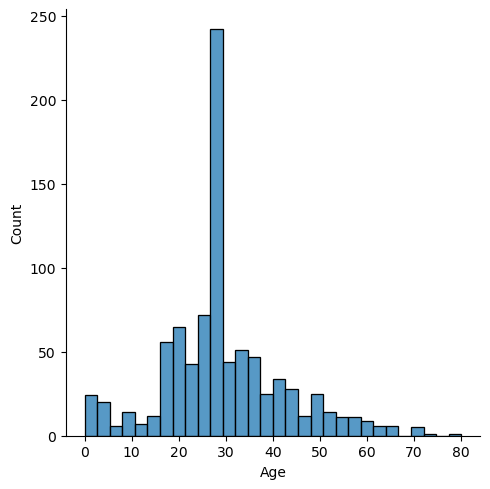

In [282]:
# for the age column

sns.displot(df['Age'])

print(df['Age'].skew())

print(df['Age'].kurt()) 

<Axes: xlabel='Age'>

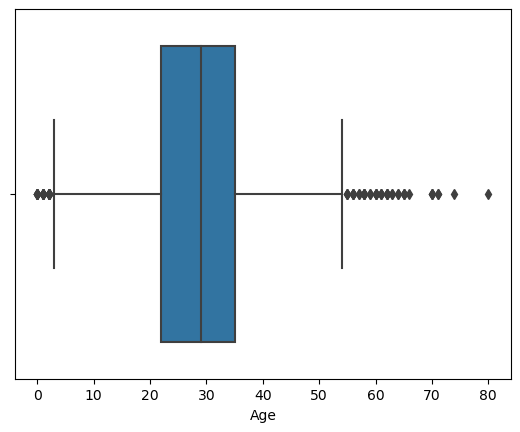

In [285]:
sns.boxplot(x='Age', data=df)

In [286]:
print("People with age greater than 70 and 75 are",df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['Age']>75].shape[0])

print('-'*50)

print("People with age between 0 and 1",df[df['Age']<1].shape[0])

People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 7


### Conclusion
**For all practical purposes age can be cosidered as normal distribution AND**
**Deeper analysis is required for outlier detection**

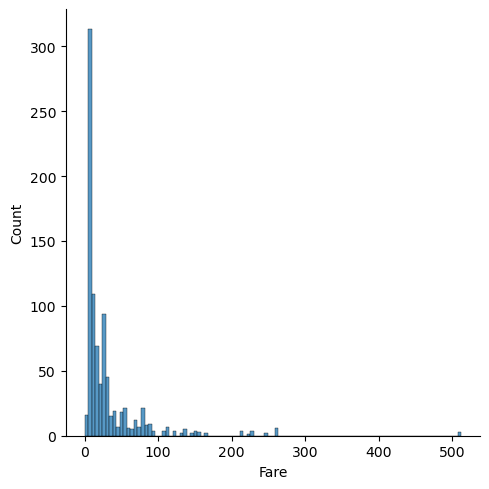

In [287]:
# FOR FARE COLUMN
sns.displot(x='Fare', data=df)

In [288]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

4.787316519674893
33.39814088089868


<Axes: >

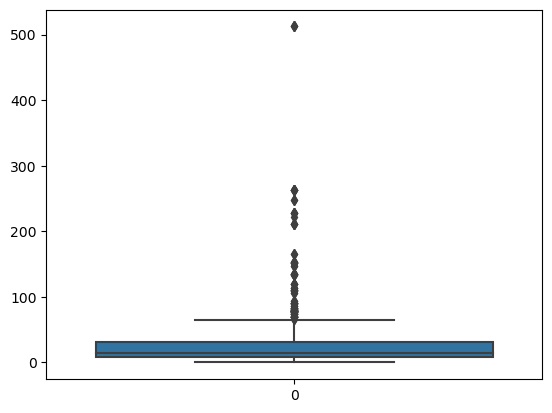

In [289]:
sns.boxplot(df['Fare'])

In [290]:
print("People with fare in between 200$ and 300$", df[(df['Fare']> 200) & (df['Fare']<300)].shape[0])
print("People with fare in greater than 300$", df[(df['Fare']>300)].shape[0])

People with fare in between 200$ and 300$ 17
People with fare in greater than 300$ 3


### Conclusion
***Higly skewed data. a lot of people had cheaper tickets and***
***Outliners are there in data (one point at 500)***

### MUTIVARINAT ANALYSIS

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


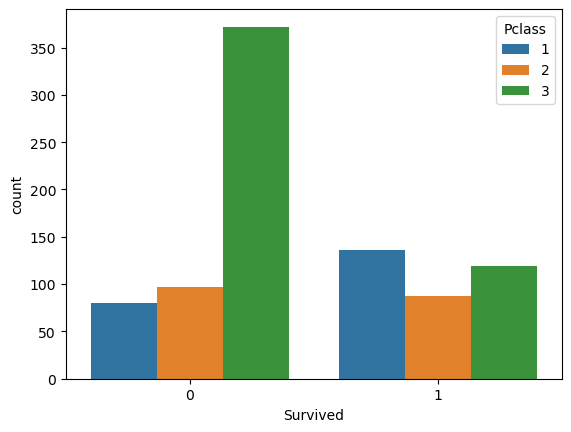

In [291]:
# Survival with Pclass

sns.countplot(x='Survived', data=df, hue = 'Pclass')

pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)

# cosstab gives below data where it suggests that 37 % of population has died. 
# Here we have calculated percetage. For without % remove from apply

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


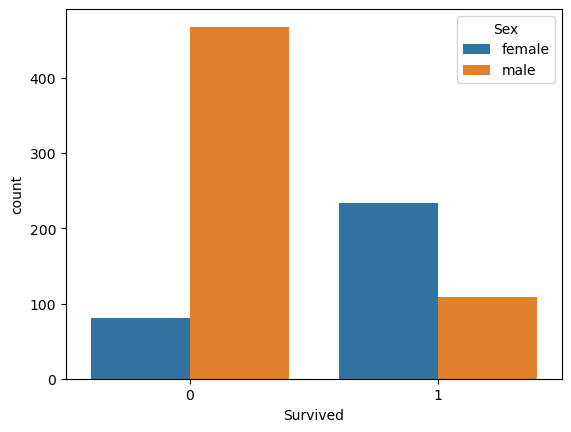

In [292]:
# Survival with SEx
sns.countplot(x='Survived', data=df, hue = 'Sex')

pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


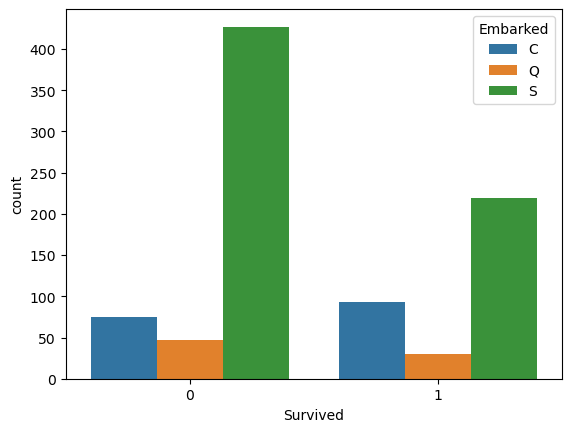

In [293]:
# Survival with Embarked
sns.countplot(x='Survived', data=df, hue = 'Embarked')

pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)

<Axes: xlabel='Age', ylabel='Count'>

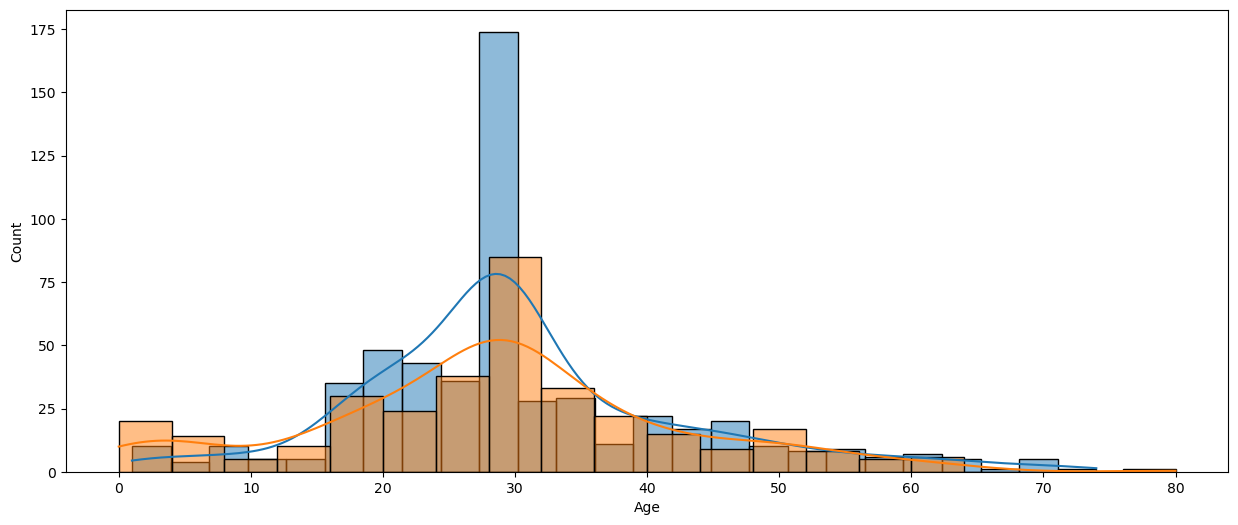

In [294]:
# Survived with age

plt.figure(figsize=(15,6))
sns.histplot(df[df['Survived']==0]['Age'], kde=True)
sns.histplot(df[df['Survived']==1]['Age'], kde=True)

# taking out row where passenger have died (0) and have survived (1) and plotted it
# sns.distplot(df[df['Survived']==0]['Age']) will give you that distplot` is a deprecated function 
# and will be removed in a future version. above method is used to plot same as distplot

<Axes: xlabel='Fare', ylabel='Density'>

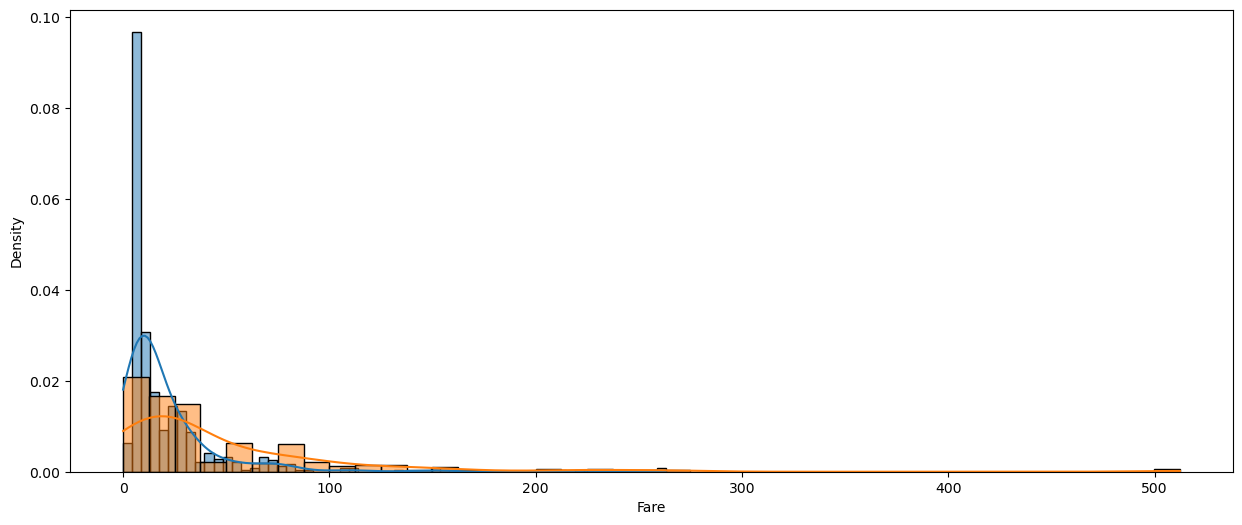

In [295]:
# Survived with Fare

plt.figure(figsize=(15,6))
sns.histplot(df[df['Survived']==0]['Fare'],kde=True, stat='density')
sns.histplot(df[df['Survived']==1]['Fare'], kde=True, stat='density')

# you can use density too in above ones

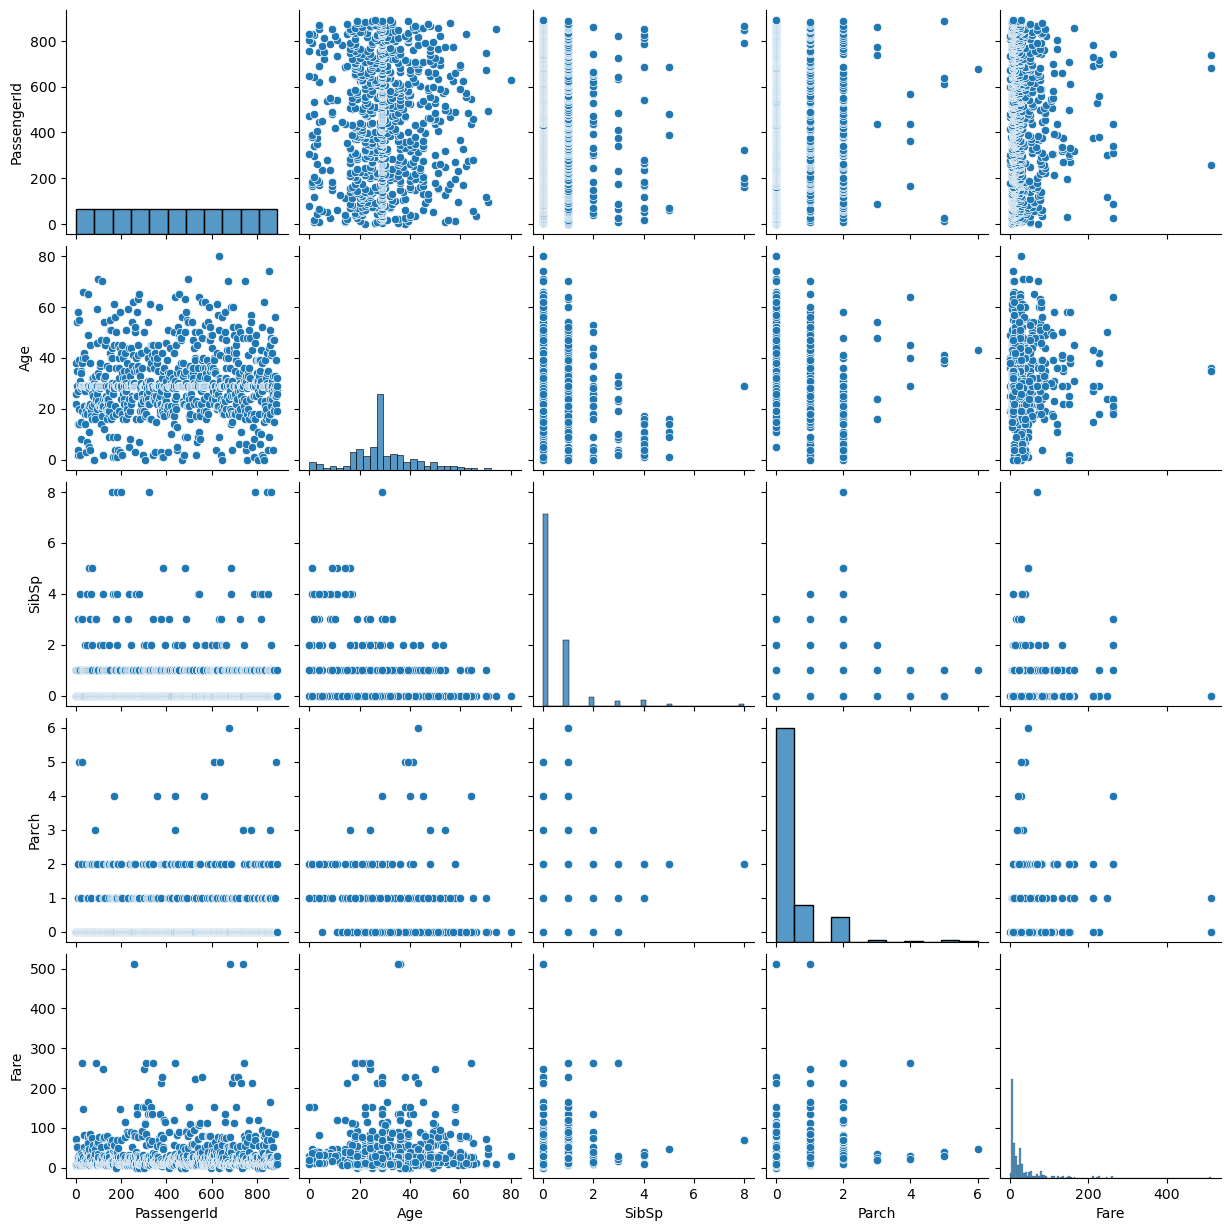

In [296]:
sns.pairplot(df)

C:\Users\Anubhav\AppData\Local\Temp\ipykernel_29204\1929835534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap ='BrBG')


<Axes: >

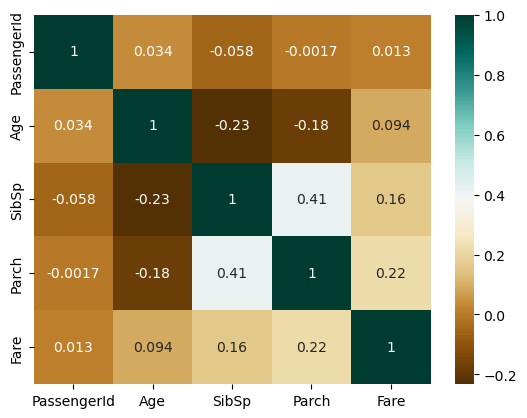

In [297]:
sns.heatmap(df.corr(), annot=True, cmap ='BrBG')
# annot = True gives specific value in each block and cmap=BrBG can be used to cahnge the color

### FEATURE ENGINERRING

***WE WILL CREATE NEW COLUMNS AND DELTE SOME OF THE COLUMNS***

In [298]:
# Creating a new column by the name of family which will be the sum of SibSp and Parch cols i.e family_size

df['family_size'] = df['Parch'] + df['SibSp']

In [299]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
698,699,0,1,"Thayer, Mr. John Borland",male,49,1,1,17421,110.8833,C,2
576,577,1,2,"Garside, Miss. Ethel",female,34,0,0,243880,13.0000,S,0
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44,1,0,244252,26.0000,S,1
93,94,0,3,"Dean, Mr. Bertram Frank",male,26,1,2,C.A. 2315,20.5750,S,3
181,182,0,2,"Pernot, Mr. Rene",male,29,0,0,SC/PARIS 2131,15.0500,C,0


In [300]:
# Now we will engineer a new feature by the name of family type by diving into three types given

def family_type(number):
    if number==0:
        return 'Alone'
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"
        

In [301]:
# now creating a new column family_type 

df['family_type'] = df['family_size'].apply(family_type)

In [302]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
611,612,0,3,"Jardin, Mr. Jose Neto",male,29,0,0,SOTON/O.Q. 3101305,7.0500,S,0,Alone
834,835,0,3,"Allum, Mr. Owen George",male,18,0,0,2223,8.3000,S,0,Alone
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,29,1,1,2661,15.2458,C,2,Medium
487,488,0,1,"Kent, Mr. Edward Austin",male,58,0,0,11771,29.7000,C,0,Alone
450,451,0,2,"West, Mr. Edwy Arthur",male,36,1,2,C.A. 34651,27.7500,S,3,Medium


In [303]:
# now we can drop SibSp , Parch, family_size 

df.drop(columns= ['SibSp' , 'Parch', 'family_size'], inplace=True)

In [304]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
489,490,1,3,"Coutts, Master. Eden Leslie ""Neville""",male,9,C.A. 37671,15.900,S,Medium
728,729,0,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25,236853,26.000,S,Medium
487,488,0,1,"Kent, Mr. Edward Austin",male,58,11771,29.700,C,Alone
26,27,0,3,"Emir, Mr. Farred Chehab",male,29,2631,7.225,C,Alone
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,230433,26.000,S,Medium


In [305]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


### OUTLINERS

***Numerical Data***

**if the data is following normal distribution, anything beyond 3SD - mean + 3SD can be considered as an outlier**

**if the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5 * IQR and Q3 + 1.5 * IQR**

**Categorical data**

**If the col is highly imbalnced for eg male 10000 and female 2 then we can eliminate female**

In [306]:
# handling outliners in age(almost normal)

df= df[df['Age'] < (df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(884, 10)

In [307]:
# ahndling outliers from Fare Column
# finding quartiles

Q1 = np.percentile(df['Fare'], 25)
Q3 = np.percentile(df['Fare'], 75)

outliers_low = Q1 - 1.5 * (Q3-Q1)
outliers_high = Q1 + 1.5 * (Q3-Q1)

df= df [ (df['Fare']> outliers_low) & (df['Fare']< outliers_high)]

### ONE HOT ENCODING
***COVERTING CATEGORICAL DATA INTO NUMERICAL VALUES***

In [308]:
df.sample(4)
pd.get_dummies(data=df, columns=['Pclass', 'Sex', 'Embarked', 'family_type'], drop_first=True)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,0,1,1,0,1,0,1
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,0,1,0,0,1,0,0
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,0,1,1,0,1,0,0
5,6,0,"Moran, Mr. James",29,330877,8.4583,0,1,1,1,0,0,0
7,8,0,"Palsson, Master. Gosta Leonard",2,349909,21.0750,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,211536,13.0000,1,0,1,0,1,0,0
887,888,1,"Graham, Miss. Margaret Edith",19,112053,30.0000,0,0,0,0,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,0,1,0,0,1,0,1
889,890,1,"Behr, Mr. Karl Howell",26,111369,30.0000,0,0,1,0,0,0,0


C:\Users\Anubhav\AppData\Local\Temp\ipykernel_29204\2488204904.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='summer', annot= True)


<Axes: >

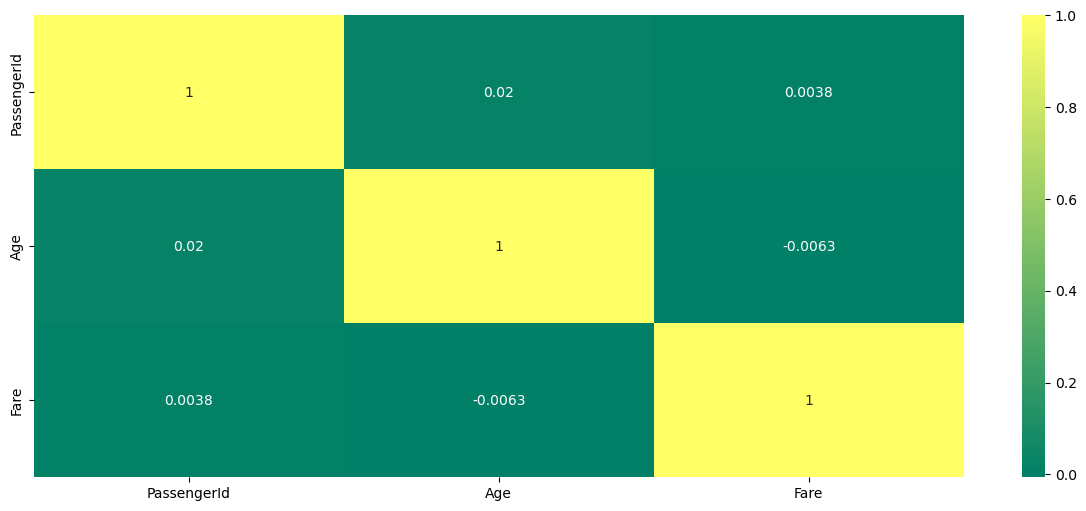

In [309]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), cmap='summer', annot= True)

### Drawing Conclusions

**Chance of female survival is higher than male survival**

**Travelling in Pclass 3 was deadliest**

**Somehow, people going to C survived more**

**People in the age range of 20 to 40 had a higher chance of not surviving**

**People travelling with smaller familes had a higher chance of surviving the accident in comparison to people with large families and travelling alone**